In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('../Data/6.K_means_5f.csv')
df

,customer_unique_id,order_status,review_score,Recency_x,Frequency_x,Monetary,Monetary_bis_x,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,7,4.0,27.289810,2,1.303348,38.71,3
1,af07308b275d755c9edb36a90c618231,7,4.0,14.162002,1,1.601216,141.46,4
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5.0,13.051752,1,1.647432,179.12,4
3,7c142cf63193a1473d2e66489a9ae977,7,5.0,25.737451,1,1.457031,72.20,1
4,72632f0f9dd73dfee390c9b22eb56dd6,7,5.0,22.505471,1,1.220373,28.62,4
...,...,...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,5.0,33.093157,1,1.494089,85.08,1
95359,da62f9e57a76d978d02ab5362c509660,7,4.0,22.786720,1,1.663569,195.00,4
95360,737520a9aad80b3fbbdad19b66b37b30,7,5.0,28.407875,1,1.723809,271.01,1
95361,5097a5312c8b157bb7be58ae360ef43c,7,2.0,23.908753,1,1.686544,220.58,0


In [3]:
df['Cluster'].unique()

array([3, 4, 1, 0, 2])

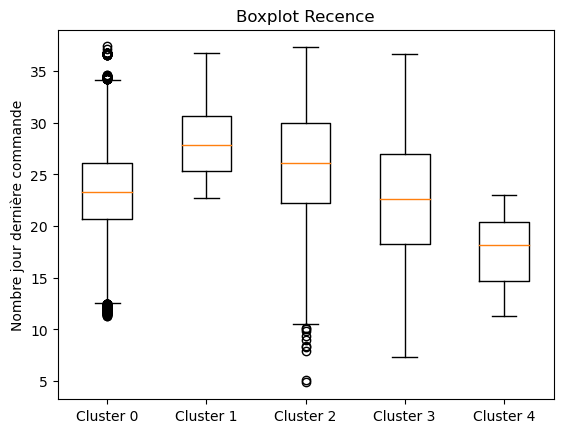

In [4]:
import matplotlib.pyplot as plt

test1 = df[df['Cluster'] == 0]
test2 = df[df['Cluster'] == 1]
test3 = df[df['Cluster'] == 2]
test4 = df[df['Cluster'] == 3]
test5 = df[df['Cluster'] == 4]
donnees = [test1['Recency_x'], test2['Recency_x'], test3['Recency_x'], test4['Recency_x'], test5['Recency_x']]

plt.boxplot(donnees)
plt.title("Boxplot Recence")
plt.ylabel("Nombre jour dernière commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

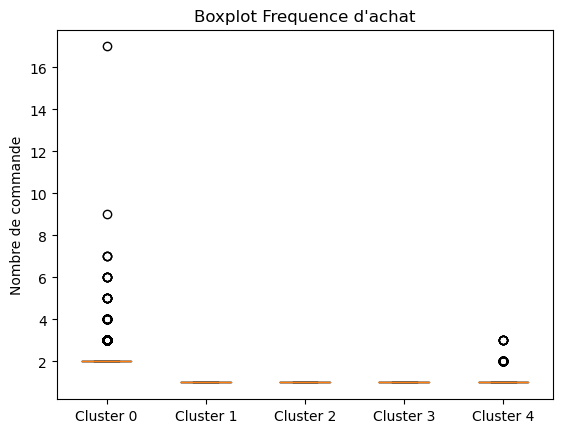

In [5]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Frequency_x'])

plt.boxplot(recency)
plt.title("Boxplot Frequence d'achat")
plt.ylabel("Nombre de commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

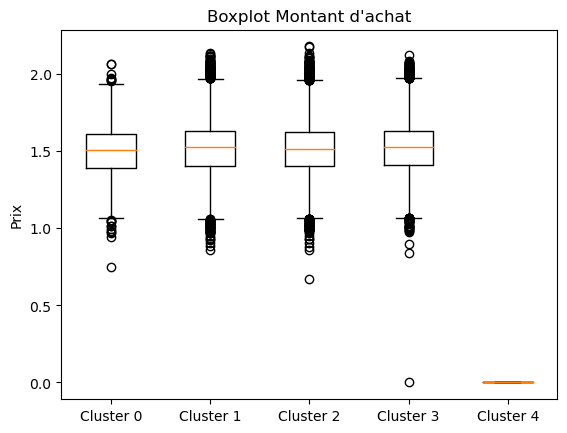

In [6]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

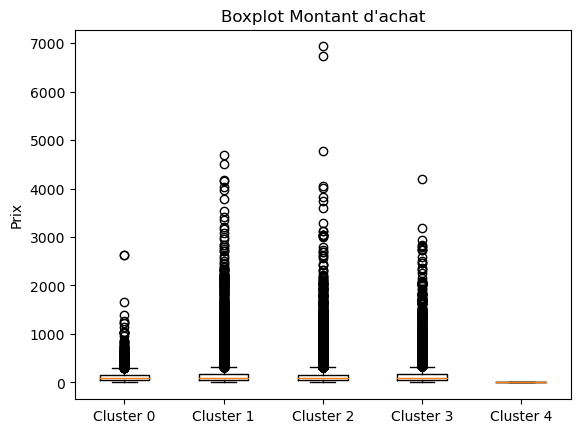

In [7]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary_bis_x'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

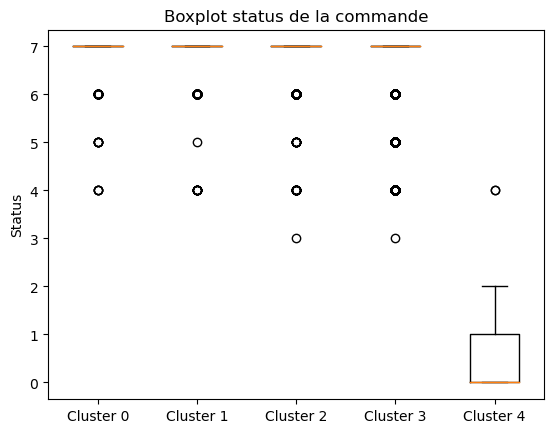

In [8]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['order_status'])

plt.boxplot(recency)
plt.title("Boxplot status de la commande")
plt.ylabel("Status")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

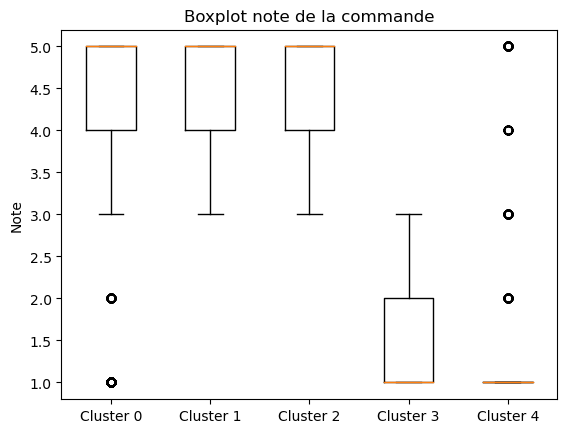

In [9]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['review_score'])

plt.boxplot(recency)
plt.title("Boxplot note de la commande")
plt.ylabel("Note")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()